In [26]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [2]:

files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()
for each in files:
    df = pd.read_csv('./Sales_Data/' + each)
    all_months_data = pd.concat([all_months_data, df])
    


In [3]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
sales = all_months_data

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [6]:
# Adding month column and extracting month 
sales['month'] = sales['Order Date'].str[0:2]

In [7]:
# Drop NAN values 
sales[sales.isna().any(axis = 1)]
sales = sales.dropna(how='all')

In [8]:
# Find 'or' and delete it 
sales = sales[sales['Order Date'].str[0:2] != 'Or']
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [9]:
# Converting Month to int datatype after dropping NAN and 'Or'
sales['month'] = sales['month'].astype('int')

In [10]:
# Converting Quantity Ordered,Price Each into flaot values
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype('int')
sales['Price Each'] = sales['Price Each'].astype('float')

sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   month             185950 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 9.9+ MB


In [11]:
# Best Month For Sales
# Add another column sales which is Quantity Ordered * Price
sales['Sales'] = sales['Quantity Ordered'] * sales['Price Each']

In [12]:
# Best Month For Sales
r=sales.groupby('month').sum()

<BarContainer object of 12 artists>

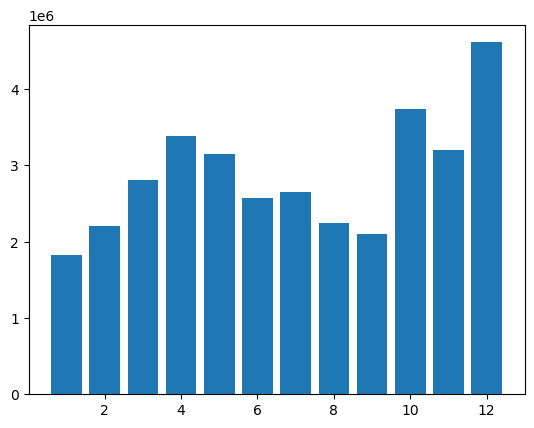

In [13]:
# Plot the Observations
month = range(1,13)
plt.bar(month,r['Sales'])

In [14]:
# Split the address column using delimiter
sales['City']=sales['Purchase Address'].str.split(',',expand = True)[1]


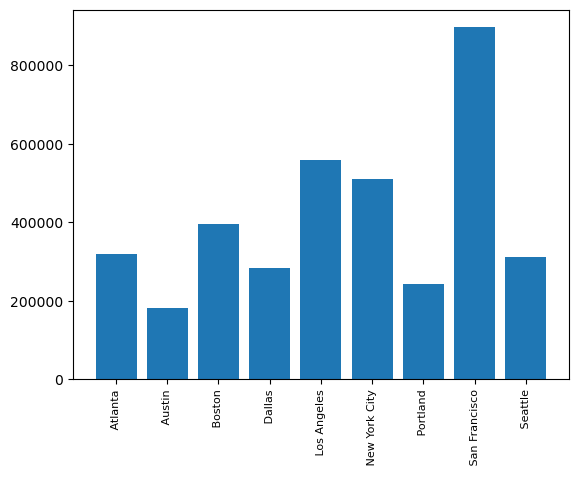

In [45]:
# Q What City had the highest nunmber of sales
f=sales.groupby('City').sum()
f
# PLot the results
city = [city for city,df in sales.groupby('City')]
plt.bar(city,f['Sales'])
plt.xticks(city, rotation = 'vertical',size = 8)
plt.show()

In [17]:
# Time to display advertisement to maximize purchases

sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Hour'] = sales['Order Date'].dt.hour
sales['Minute'] = sales['Order Date'].dt.minute
sales.head()
hour = [hour for hour,df in sales.groupby('Hour')]
plt.plot(hour,sales.groupby(['Hour']).count())
plt.xticks(hour)
plt.xlabel('Hour')
plt.ylabel('Number Of Hours')
plt.grid()
plt.show()
# The Best time to advertise would be around 11 am and 7 pm

In [22]:
sales = sales[sales['Order ID'].duplicated(keep=False)]
sales['All_Products'] = sales.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
sales.head()

C:\Users\satya\AppData\Local\Temp\ipykernel_19964\2659138424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['All_Products'] = sales.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute,All_Products
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [28]:
# What products are sold together?
# The two most commonly sold items were -
sold_together = sales[['Order ID','All_Products']].drop_duplicates()
sold_together.head()
count = Counter()
for each in sold_together['All_Products']:
    row = each. split(',')
    count.update(Counter(combinations(row,2)))
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [29]:
# The three most commonly sold items were-
sold_together = sales[['Order ID','All_Products']].drop_duplicates()
sold_together.head()
count = Counter()
for each in sold_together['All_Products']:
    row = each. split(',')
    count.update(Counter(combinations(row,3)))
for key,value in count.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


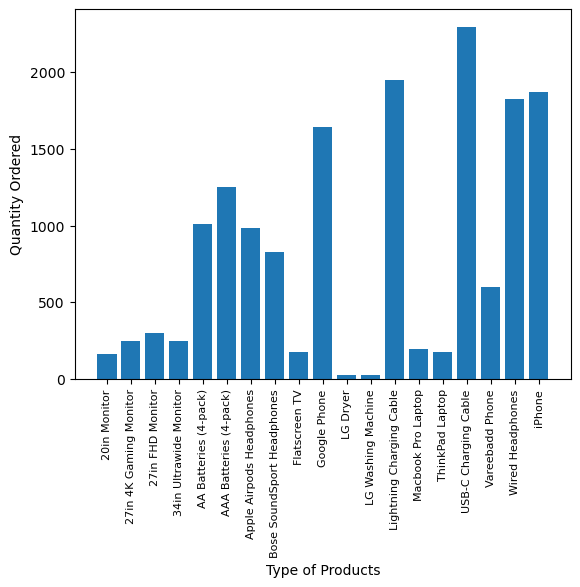

In [43]:
# Best Selling Products
bs = sales.groupby('Product')
qo = bs.sum()['Quantity Ordered']
products = [each for each,df in bs]
plt.bar(products,qo)
plt.xticks(products,rotation='vertical',size = 8)
plt.xlabel('Type of Products')
plt.ylabel('Quantity Ordered')
plt.show()